### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(31415)

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import preprocessing

In [3]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [4]:
X = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [8]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [9]:
X.shape

(506, 13)

In [10]:
def train_test(X, y):
  X_train = X[:len(X)*9//10]
  X_test = X[len(X)*9//10:]

  y_train = y[:len(X)*9//10]
  y_test = y[len(X)*9//10:]
  return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = train_test(X, y)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [13]:
def MSE(y_real, y_pred):
  return np.mean((y_real - y_pred)**2)

In [14]:
print('Sklearn MSE: ', mean_squared_error(y_test, pred))
print('Own MSE: ', MSE(y_test, pred))

Sklearn MSE:  10.80620138107823
Own MSE:  10.80620138107823


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [15]:
naive_pred = np.mean(y_train)

In [16]:
MSE(y_test, naive_pred)

36.92078071465273

Как видно из сравнения результатов MSE, линейная регрессия оказалась неплоха по сравнению с обычным средним. \
Но можно ли еще лучше?

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

1. Подберем сначала хороший коэффициент для Ridge-регрессии

In [17]:
lambdas = np.arange(0.1, 5.1, 0.1)
lambda_error = []

for val in lambdas:
  mod = Ridge(alpha = val)
  err = np.mean(-cross_val_score(mod, X_test, y_test, cv = 5, scoring='neg_mean_squared_error'))
  lambda_error.append([val, err])

min_val, min_train_error = min(lambda_error, key=lambda x: x[1])

print("Оптимальная Lambda для Ridge = {:.2f}, результат MSE = {:.4f}".format(min_val, min_train_error))

Оптимальная Lambda для Ridge = 0.40, результат MSE = 12.4927


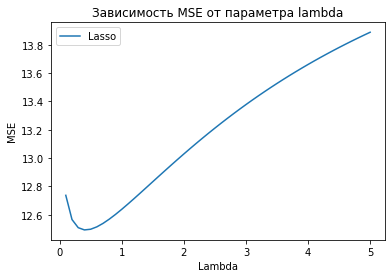

In [18]:
plt.plot(np.array(lambda_error)[:,0], np.array(lambda_error)[:,1], label = 'Lasso')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Зависимость MSE от параметра lambda')
plt.legend()
plt.show()

Не особо как-то помогла регуляризация, даже хуже стало (хотя возможно линейной регрессии просто повезло с куском данных, все же там всего 10% в тестовом массиве) \
Посмотрим коэффициенты регрессии:

In [19]:
model = Ridge(alpha = min_val).fit(X, y)
for column, coef in zip(X.columns, model.coef_):
    print("Коэффициент для {} = {}".format(column, coef))

Коэффициент для CRIM = -0.10620310587947533
Коэффициент для ZN = 0.04693988966112368
Коэффициент для INDUS = 0.005153636216701454
Коэффициент для CHAS = 2.6255098050265224
Коэффициент для NOX = -14.107160397745117
Коэффициент для RM = 3.836429108904245
Коэффициент для AGE = -0.0025409132066551905
Коэффициент для DIS = -1.4216628096214008
Коэффициент для RAD = 0.29756004361195043
Коэффициент для TAX = -0.012629260915674914
Коэффициент для PTRATIO = -0.9123358873163891
Коэффициент для B = 0.009501949372396111
Коэффициент для LSTAT = -0.5289808576509617


Ага, можно попробовать убрать некоторые колонки с малым коэффициентом или возвести в степень те что с большим. \
Будем проверять на Ridge-регрессии

In [20]:
X1 = X.drop(['AGE', 'ZN'], axis = 1)
X_train, X_test, y_train, y_test = train_test(X1, y)
model = Ridge(alpha = min_val)
model.fit(X_train, y_train)
pred = model.predict(X_test)
MSE(y_test, pred)

10.383085814267634

In [21]:
X2 = X1.drop(['NOX'], axis = 1)
#X2 = X1.copy()
X2['NOXp'] = X1['NOX']**3

X_train, X_test, y_train, y_test = train_test(X2, y)
model = Ridge(alpha = min_val)
model.fit(X_train, y_train)
pred = model.predict(X_test)
MSE(y_test, pred)

10.162146978982502

Есть ли корреляции? (да-да, самое время проверить))

In [22]:
correlated = X.corr()
correlated[(correlated > 0.7) & (correlated != 1.0)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,NaN,NaN,0.763651,NaN,NaN,NaN,NaN,0.720760,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,NaN,NaN,0.73147,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,0.731470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,NaN,NaN,NaN
TAX,NaN,NaN,0.720760,NaN,NaN,NaN,NaN,NaN,0.910228,NaN,NaN,NaN,NaN


TAX сильно коррелирует с RAD, а еще имеет маленький вес в Ridge. Уберем его. \
Однако с INDUS такой трюк не прошел

In [23]:
X3 = X2.drop(['TAX'], axis = 1)
#X2 = X1.copy()

X_train, X_test, y_train, y_test = train_test(X3, y)
model = Ridge(alpha = min_val)
model.fit(X_train, y_train)
pred = model.predict(X_test)
MSE(y_test, pred)

9.28150775026558

Что ж, на сегодня хватит)

# Лучший результат MSE = 9.28